# IMPORTANT LIBRARIES

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import re
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')
import plotly.express as px

# Reading CSV file

In [3]:
stats = pd.read_excel(r"C:\Users\91798\Downloads\aspiring_minds_employability_outcomes_2015.xlsx")

# Raw Dataset

In [3]:
stats

,Unnamed: 0,ID,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,train,203097,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,train,579905,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,train,810601,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,train,267447,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,train,343523,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,train,47916,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,train,752781,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,train,355888,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,train,947111,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


# Data cleaning

### Dropping Unwanted Columns

In [4]:
stats.drop(labels=["Unnamed: 0",'CollegeCityID','CollegeCityTier',"CollegeID","Domain","ID"],axis=1,inplace=True)

In [5]:
stats

,Salary,DOJ,DOL,Designation,JobCity,Gender,DOB,10percentage,10board,12graduation,...,ComputerScience,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience
0,420000,2012-06-01,present,senior quality engineer,Bangalore,f,1990-02-19,84.30,"board ofsecondary education,ap",2007,...,-1,-1,-1,-1,-1,0.9737,0.8128,0.5269,1.35490,-0.4455
1,500000,2013-09-01,present,assistant manager,Indore,m,1989-10-04,85.40,cbse,2007,...,-1,-1,-1,-1,-1,-0.7335,0.3789,1.2396,-0.10760,0.8637
2,325000,2014-06-01,present,systems engineer,Chennai,f,1992-08-03,85.00,cbse,2010,...,-1,-1,-1,-1,-1,0.2718,1.7109,0.1637,-0.86820,0.6721
3,1100000,2011-07-01,present,senior software engineer,Gurgaon,m,1989-12-05,85.60,cbse,2007,...,-1,-1,-1,-1,-1,0.0464,0.3448,-0.3440,-0.40780,-0.9194
4,200000,2014-03-01,2015-03-01 00:00:00,get,Manesar,m,1991-02-27,78.00,cbse,2008,...,-1,-1,-1,-1,-1,-0.8810,-0.2793,-1.0697,0.09163,-0.1295
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,2011-10-01,2012-10-01 00:00:00,software engineer,New Delhi,m,1987-04-15,52.09,cbse,2006,...,-1,-1,-1,-1,-1,-0.1082,0.3448,0.2366,0.64980,-0.9194
3994,100000,2013-07-01,2013-07-01 00:00:00,technical writer,Hyderabad,f,1992-08-27,90.00,state board,2009,...,-1,-1,-1,-1,-1,-0.3027,0.8784,0.9322,0.77980,-0.0943
3995,320000,2013-07-01,present,associate software engineer,Bangalore,m,1991-07-03,81.86,"bse,odisha",2008,...,-1,-1,-1,-1,-1,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615
3996,200000,2014-07-01,2015-01-01 00:00:00,software developer,Asifabadbanglore,f,1992-03-20,78.72,state board,2010,...,438,-1,-1,-1,-1,-0.1590,0.0459,-0.4511,-0.36120,-0.0943


## Data Cleaning and Manipulation

## JobCity 

In [6]:
l=['Asifabadbanglore','Mangalore','BANGLORE','Banglore','Bangalore ','bangalore','Banagalore','BANGALORE','bengaluru','bangalore ','BAngalore','banglore','Chennai, Bangalore','Banglore ',' bangalore','Banglore ','Banaglore','BANGALORE ','Bengaluru']
l1=[]
for i in stats.JobCity:
    if i in l:
        l1.append("Bangalore")
    else:
        l1.append(i)
stats["JobCity"]=l1
        

In [7]:
l=['Noida','NOIDA','noida','Greater Noida','noida ','Greater noida','Nouda','A-64,sec-64,noida','GREATER NOIDA','Greater NOIDA','Noida ']
l2=[]
for i in stats["JobCity"]:
    if i in l:
        l2.append("Noida")
    else:
        l2.append(i)
stats["JobCity"]=l2

In [8]:
l=['Hyderabad','Hyderabad ','HYDERABAD','hyderabad','Secunderabad','hyderabad(bhadurpally)','hderabad','hyderabad ']
l3=[]
for i in stats["JobCity"]:
    if i in l:
        l3.append("Hyderabad")
    else:
        l3.append(i)
stats["JobCity"]=l3

In [9]:
l=['Pune','Pune ','pune ','PUNE',' Pune','punr','pune']
l4=[]
for i in stats["JobCity"]:
    if i in l:
        l4.append("Pune")
    else:
        l4.append(i)
stats["JobCity"]=l4

In [10]:
l=['Chennai','chennai','CHENNAI',' Chennai','Chennai ','Kochi/Cochin, Chennai and Coimbatore']
l5=[]
for i in stats["JobCity"]:
    if i in l:
        l5.append("Chennai")
    else:
        l5.append(i)
stats["JobCity"]=l5

In [11]:
l=['Gurgaon','GURGOAN','Gurgaon ','gurgoan','Gurga','Gurgoan','GURGAON','GURAGAON']
l6=[]
for i in stats["JobCity"]:
    if i in l:
        l6.append("Gurugram")
    else:
        l6.append(i)
stats["JobCity"]=l6

In [12]:
l=['New Delhi','new delhi - jaisalmer','New delhi','new delhi',' Delhi','Delhi/NCR','NEW DELHI','new dehli','delhi']
l7=[]
for i in stats["JobCity"]:
    if i in l:
        l7.append("Delhi")
    else:
        l7.append(i)
stats["JobCity"]=l7

In [13]:
l=['Navi Mumbai','Mumbai','mumbai','Mumbai ','mumbai ','MUMBAI',' mumbai','NAVI MUMBAI','Navi Mumbai , Hyderabad','Navi mumbai',' Mumbai']
l8=[]
for i in stats["JobCity"]:
    if i in l:
        l8.append("Mumbai")
    else:
        l8.append(i)
stats["JobCity"]=l8

In [14]:
l=['Kolkata','kolkata','KOLKATA','Calicut','Kolkata ']
l9=[]
for i in stats["JobCity"]:
    if i in l:
        l9.append("Kolkata")
    else:
        l9.append(i)
stats["JobCity"]=l9

In [15]:
stats['JobCity'].replace(to_replace=-1, value='Unknown', inplace=True)

## Designation

In [16]:
m=['associate software engg','junior software engineer','trainee software engineer','software engineer','associate software engineer','software development engineer','embedded software engineer','software trainee','software trainee engineer','software enginner','delivery software engineer','software engineer associate','software engineere','software programmer','software engg','software eng','software engineering associate']
m1=[]
for i in stats["Designation"]:
    if i in m:
        m1.append("Software Engineer")
    else:
        m1.append(i)
stats["Designation"]=m1

In [17]:
m=['systems engineer','system engineer','ase','assistant system engineer','systems administrator','assistant systems engineer','associate system engineer','system engineer trainee','assistant system engineer trainee','assistant system engineer - trainee']
m2=[]
for i in stats["Designation"]:
    if i in m:
        m2.append("System Engineer")
    else:
        m2.append(i)
stats["Designation"]=m2

In [18]:
m=['associate software developer','application developer','software developer','trainee software developer','mobile application developer','junior software developer','web application developer','software devloper','front end web developer','full stack developer','associate developer','front end developer','jr. software developer']
m3=[]
for i in stats["Designation"]:
    if i in m:
        m3.append("Software Developer")
    else:
        m3.append(i)
stats["Designation"]=m3

In [19]:
m=['software test engineer (etl)','qa analyst','programmer analyst','test engineer','software test engineer','quality analyst','programmer analyst trainee','software quality assurance tester','software quality assurance analyst','quality assurance test engineer','quality assurance tester','quality associate','manual tester','software tester','associate test engineer','software analyst','software test engineerte','program analyst trainee']
m4=[]
for i in stats["Designation"]:
    if i in m:
        m4.append("Software Test Engineer")
    else:
        m4.append(i)
stats["Designation"]=m4

In [20]:
m=['technical support engineer','technical support executive','technical support specialist','telecom support engineer','junior engineer product support','desktop support technician','support engineer','administrative support','desktop support engineer']
m5=[]
for i in stats["Designation"]:
    if i in m:
        m5.append("Technical Support Engineer")
    else:
        m5.append(i)
stats["Designation"]=m5

In [21]:
m=['customer service','customer service representative','engineer- customer support','customer service manager','customer support engineer','customer care executive']
m6=[]
for i in stats["Designation"]:
    if i in m:
        m6.append("Customer Support")
    else:
        m6.append(i)
stats["Designation"]=m6

In [22]:
m=['hr recruiter','human resources associate','hr generalist','hr manager','human resources intern','human resource assistant','hr assistant','human resources analyst','hr executive','recruitment associate']
m7=[]
for i in stats["Designation"]:
    if i in m:
        m7.append("Human Resource")
    else:
        m7.append(i)
stats["Designation"]=m7

### Graduation Year

In [23]:
stats.GraduationYear.value_counts()

2013    1181
2014    1036
2012     847
2011     507
2010     292
2015      94
2009      24
2017       8
2016       7
0          1
2007       1
Name: GraduationYear, dtype: int64

In [24]:
stats.drop(stats[stats['GraduationYear']==0].index,inplace=True,axis=0)

### 10board

In [25]:
stats['10board'].value_counts()

cbse                          1394
state board                   1164
0                              350
icse                           281
ssc                            122
                              ... 
hse,orissa                       1
national public school           1
nagpur board                     1
jharkhand academic council       1
bse,odisha                       1
Name: 10board, Length: 275, dtype: int64

In [26]:
stats['10board'].replace(to_replace=0, value='cbse', inplace=True)

### 12board

In [27]:
stats['12board'].value_counts()

cbse                                1399
state board                         1254
0                                    359
icse                                 129
up board                              87
                                    ... 
jawahar higher secondary school        1
nagpur board                           1
bsemp                                  1
board of higher secondary orissa       1
boardofintermediate                    1
Name: 12board, Length: 340, dtype: int64

In [28]:
stats['12board'].replace(to_replace=0, value='cbse', inplace=True)

## DOL

In [29]:
k=[]
for i in stats.DOL:
    if i=="present":
        k.append("2015")
    else:
        k.append(i)
stats["DOL_Year"]=k

In [30]:
stats["DOL_Year"]=stats["DOL_Year"].astype("datetime64[ns]")

In [31]:
stats["DOL_Year"]=stats.DOL_Year.dt.year

## DOJ

In [32]:
stats["DOJ_Year"]=stats.DOJ.dt.year

## Birth Year

In [33]:
stats["Birth_Year"]=stats.DOB.dt.year

In [34]:
stats.drop(labels=["DOJ","DOL","DOB"],axis=1,inplace=True)

## Experience

In [35]:
stats["Experience"]=stats["DOL_Year"]-stats["DOJ_Year"]

In [36]:
stats["Experience"].unique()

array([ 3,  2,  1,  4,  0,  5,  9,  6, 24,  8], dtype=int64)

In [37]:
stats.drop(stats[stats["Experience"]==24].index,axis=0,inplace=True)

In [38]:
stats["Experience"].unique()

array([3, 2, 1, 4, 0, 5, 9, 6, 8], dtype=int64)

## Age

In [39]:
stats["Age"]=2015 -stats["Birth_Year"]

## Specialization

In [40]:
s=[]
for i in stats["Specialization"]:
    if i.split()[0] == "civil":
        s.append("civil")
    elif i.split()[0] == "computer":
        s.append("CS")
    elif i.split()[0] == "information":
        s.append("IT")
    elif i.split()[0] == "electronics":
        s.append("ETC")
    elif i.split()[0] == "mechanical":
        s.append("ME")
    elif i.split()[0] == "electrical":
        s.append("EE")
    else:
        s.append("other")

In [41]:
stats["Specialization"]=s

In [42]:
stats.Specialization.unique()

array(['CS', 'ETC', 'IT', 'ME', 'other', 'EE', 'civil'], dtype=object)

## Cleaned DataFrame

In [43]:
stats

,Salary,Designation,JobCity,Gender,10percentage,10board,12graduation,12percentage,12board,CollegeTier,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOL_Year,DOJ_Year,Birth_Year,Experience,Age
0,420000,senior quality engineer,Bangalore,f,84.30,"board ofsecondary education,ap",2007,95.80,"board of intermediate education,ap",2,...,0.9737,0.8128,0.5269,1.35490,-0.4455,2015,2012,1990,3,25
1,500000,assistant manager,Indore,m,85.40,cbse,2007,85.00,cbse,2,...,-0.7335,0.3789,1.2396,-0.10760,0.8637,2015,2013,1989,2,26
2,325000,System Engineer,Chennai,f,85.00,cbse,2010,68.20,cbse,2,...,0.2718,1.7109,0.1637,-0.86820,0.6721,2015,2014,1992,1,23
3,1100000,senior software engineer,Gurugram,m,85.60,cbse,2007,83.60,cbse,1,...,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2015,2011,1989,4,26
4,200000,get,Manesar,m,78.00,cbse,2008,76.80,cbse,2,...,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,2014,1991,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,Software Engineer,New Delhi,m,52.09,cbse,2006,55.50,cbse,2,...,-0.1082,0.3448,0.2366,0.64980,-0.9194,2012,2011,1987,1,28
3994,100000,technical writer,Hyderabad,f,90.00,state board,2009,93.00,state board,2,...,-0.3027,0.8784,0.9322,0.77980,-0.0943,2013,2013,1992,0,23
3995,320000,Software Engineer,Bangalore,m,81.86,"bse,odisha",2008,65.50,"chse,odisha",2,...,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2015,2013,1991,2,24
3996,200000,Software Developer,Bangalore,f,78.72,state board,2010,69.88,state board,2,...,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2015,2014,1992,1,23


In [44]:
stats.to_csv(r"C:\Users\91798\Desktop\Data Science\Statictics\AMCAT.csv")# Converting into csv file to use for visualization Don't have restart and run all command to edit

In [4]:
stats=pd.read_csv(r"C:\Users\91798\Desktop\Data Science\Statictics\AMCAT.csv")

In [45]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3996 entries, 0 to 3997
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Salary                 3996 non-null   int64  
 1   Designation            3996 non-null   object 
 2   JobCity                3996 non-null   object 
 3   Gender                 3996 non-null   object 
 4   10percentage           3996 non-null   float64
 5   10board                3996 non-null   object 
 6   12graduation           3996 non-null   int64  
 7   12percentage           3996 non-null   float64
 8   12board                3996 non-null   object 
 9   CollegeTier            3996 non-null   int64  
 10  Degree                 3996 non-null   object 
 11  Specialization         3996 non-null   object 
 12  collegeGPA             3996 non-null   float64
 13  CollegeState           3996 non-null   object 
 14  GraduationYear         3996 non-null   int64  
 15  Engl

# Univariante Analysis

## Categorical Analysis

In [46]:
stats.select_dtypes(include="object")

,Designation,JobCity,Gender,10board,12board,Degree,Specialization,CollegeState
0,senior quality engineer,Bangalore,f,"board ofsecondary education,ap","board of intermediate education,ap",B.Tech/B.E.,CS,Andhra Pradesh
1,assistant manager,Indore,m,cbse,cbse,B.Tech/B.E.,ETC,Madhya Pradesh
2,System Engineer,Chennai,f,cbse,cbse,B.Tech/B.E.,IT,Uttar Pradesh
3,senior software engineer,Gurugram,m,cbse,cbse,B.Tech/B.E.,CS,Delhi
4,get,Manesar,m,cbse,cbse,B.Tech/B.E.,ETC,Uttar Pradesh
...,...,...,...,...,...,...,...,...
3993,Software Engineer,New Delhi,m,cbse,cbse,B.Tech/B.E.,IT,Haryana
3994,technical writer,Hyderabad,f,state board,state board,B.Tech/B.E.,ETC,Telangana
3995,Software Engineer,Bangalore,m,"bse,odisha","chse,odisha",B.Tech/B.E.,CS,Orissa
3996,Software Developer,Bangalore,f,state board,state board,B.Tech/B.E.,CS,Karnataka


### Gender

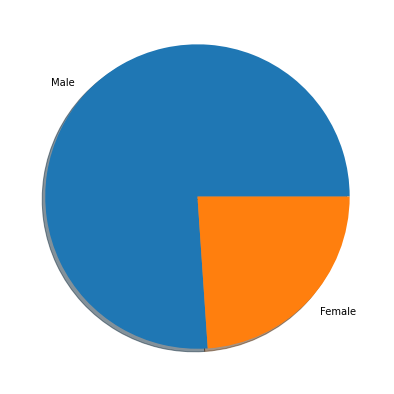

In [47]:
Counts = stats.Gender.value_counts()
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=['Male','Female'],shadow=True)
plt.xticks(rotation=45)
plt.show()

* In Male - Female Ratio, male is dominating as per amcat exam is concerned

### 10th board

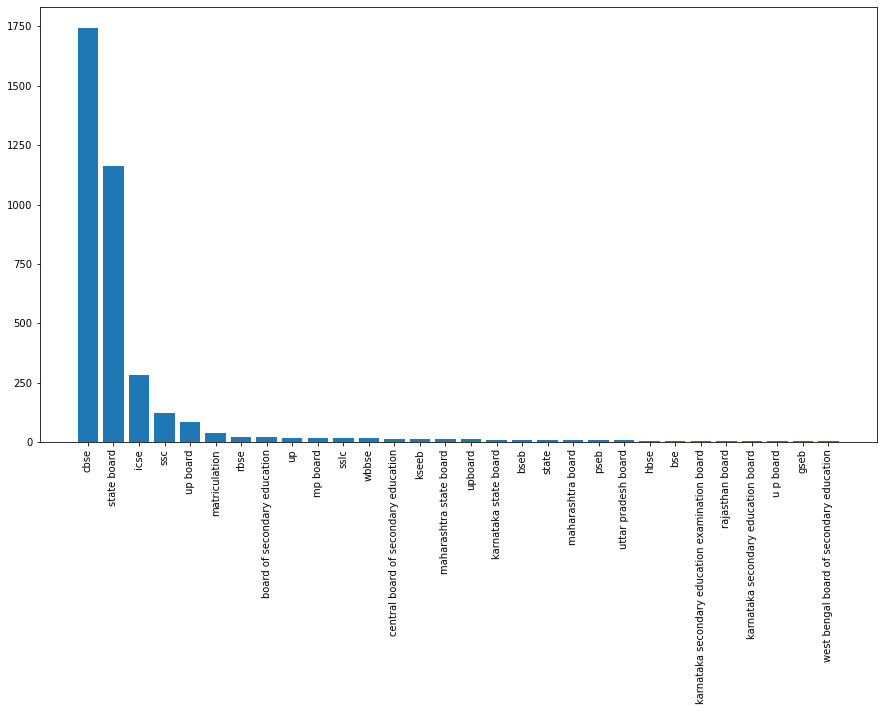

In [48]:
Counts = stats["10board"].value_counts()[0:30] 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.xticks(rotation=90)
plt.show()

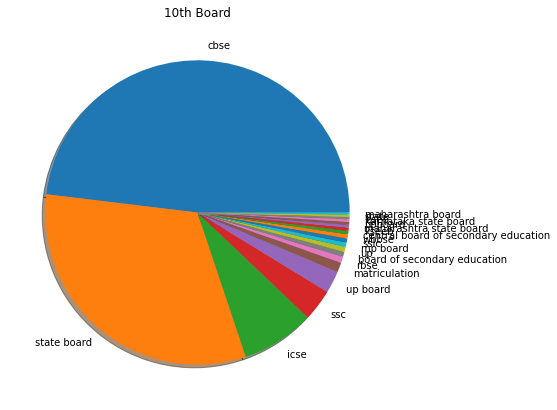

In [49]:
Counts = stats["10board"].value_counts()[0:20]
Names = Counts.index
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=Names,shadow=True)
plt.xticks(rotation=45)
plt.title("10th Board")
plt.show()

* CBSE and State Board are Dominanted 

### 12th Board

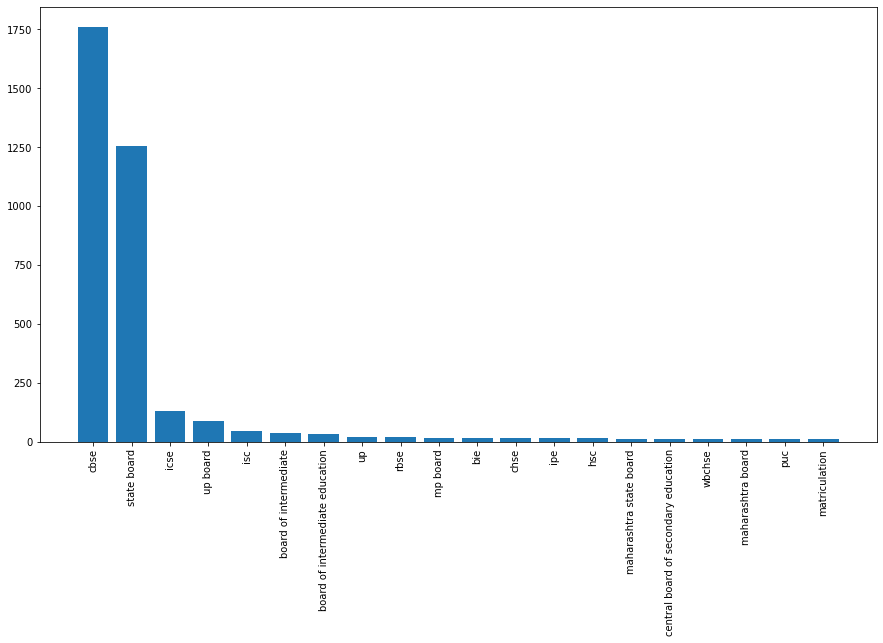

In [50]:
Counts = stats["12board"].value_counts()[0:20] 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.xticks(rotation=90)
plt.show()

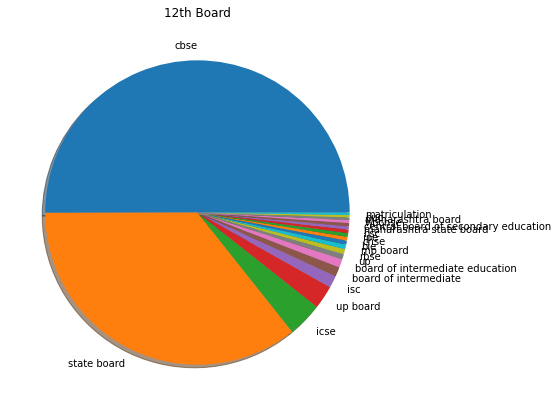

In [51]:
Counts = stats["12board"].value_counts()[0:20]
Names = Counts.index
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=Names,shadow=True)
plt.xticks(rotation=45)
plt.title("12th Board")
plt.show()

* In 12th board, CBSE and State board are also more. 

 ### Degree

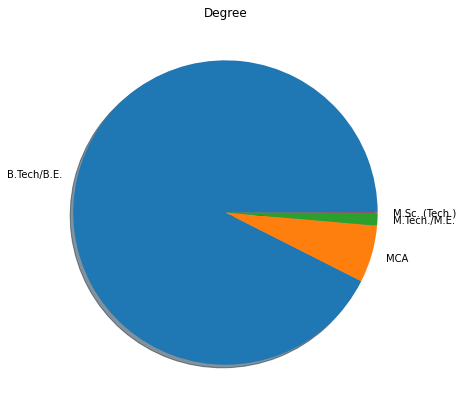

In [52]:
Counts = stats.Degree.value_counts()
Names = Counts.index
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=Names,shadow=True)
plt.xticks(rotation=45)
plt.title("Degree")
plt.show()

* Btech and BE are more

### Specialization

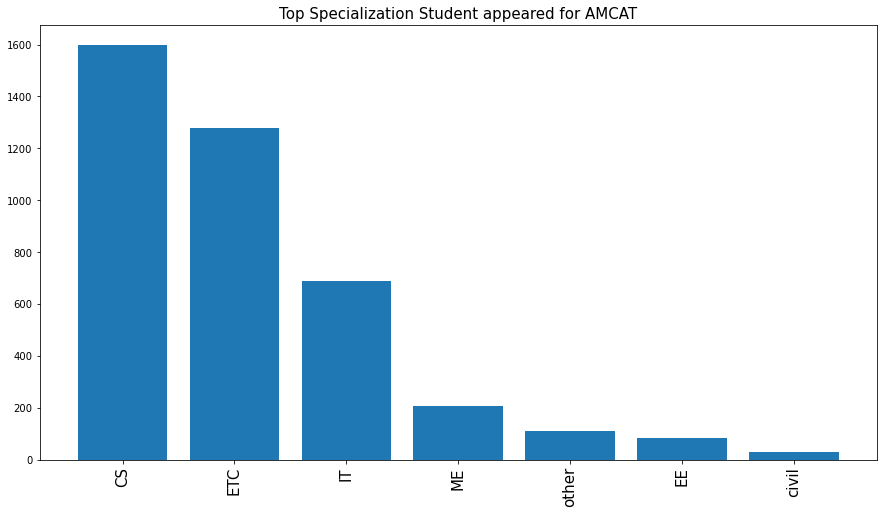

In [53]:
Counts = stats["Specialization"].value_counts() 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.xticks(rotation=90)
plt.title("Top Specialization Student appeared for AMCAT",fontsize= "15")
plt.xticks(fontsize= "15" )
plt.show()

* Etc and Cs Branch people are giving more this exam

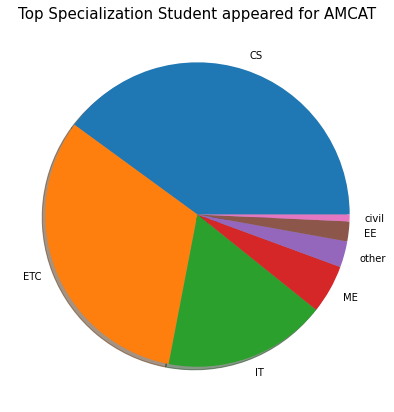

In [54]:
Counts = stats.Specialization.value_counts()
Names = Counts.index
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=Names,shadow=True)
plt.title("Top Specialization Student appeared for AMCAT",fontsize= "15")
plt.xticks(fontsize= "15" )
plt.xticks(rotation=45)
plt.show()

### College State

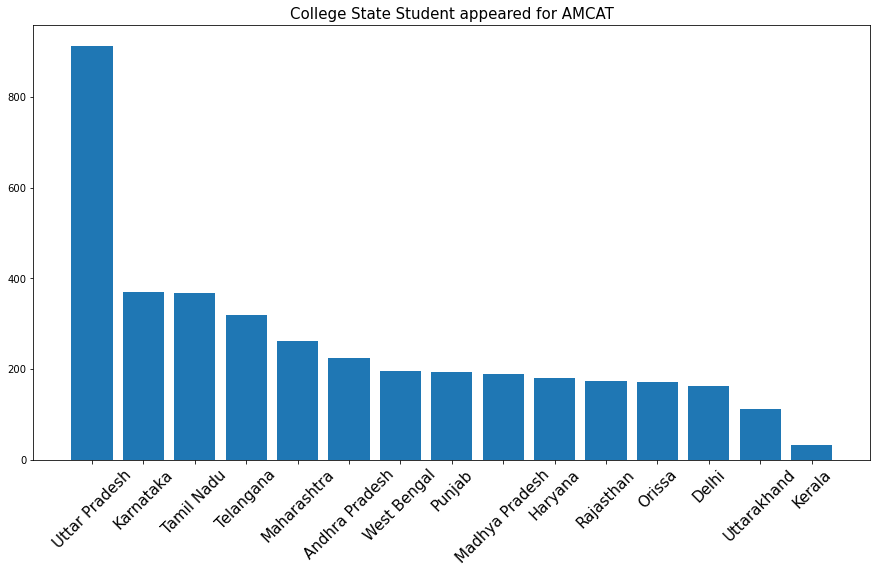

In [55]:
Counts = stats["CollegeState"].value_counts()[0:15] 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.title("College State Student appeared for AMCAT",fontsize= "15")
plt.xticks(fontsize= "15" )
plt.xticks(rotation=45)
plt.show()

* UP Karnataka Tamil Naidu Telangana and Maharashtra people are giving more exam

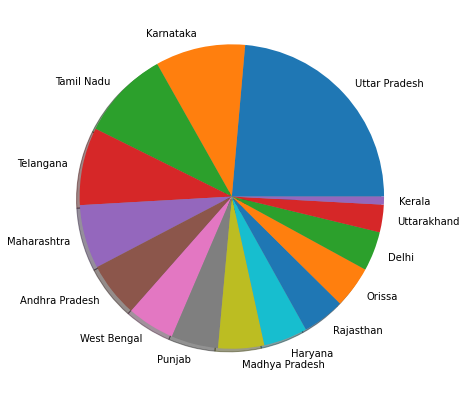

In [56]:
Counts = stats.CollegeState.value_counts()[0:15]
Names = Counts.index
plt.figure(figsize=(7,7))
plt.pie(Counts,labels=Names,shadow=True)
plt.xticks(rotation=45)
plt.show()

## Designation

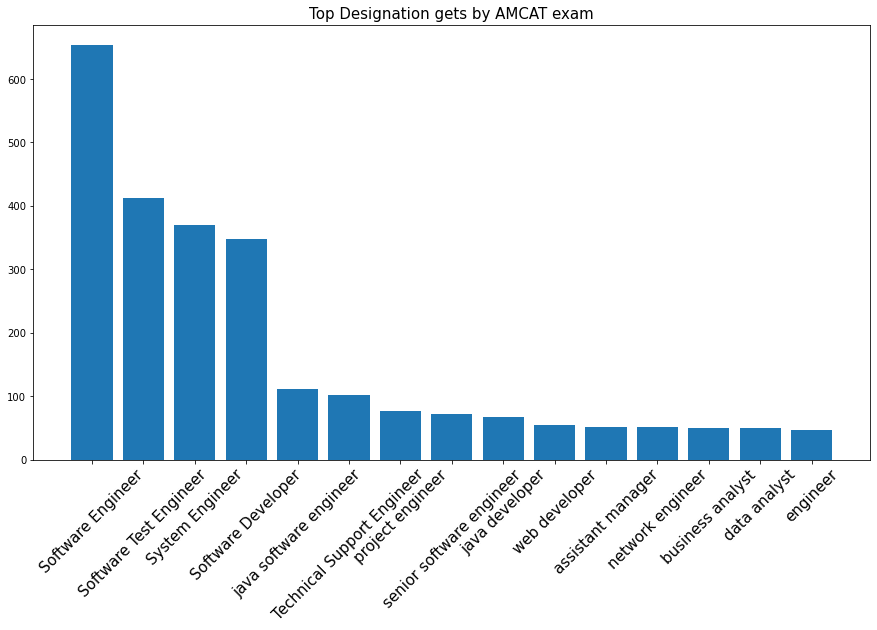

In [57]:
Counts = stats.Designation.value_counts()[0:15] 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.xticks(rotation=45)
plt.title("Top Designation gets by AMCAT exam",fontsize= "15")
plt.xticks(fontsize= "15" )
plt.show()

#### Job roles getting more by AMCAT exam are :
+ Software engineer
+ Software test engineer
+ System engineer 
+ Software developer


## JobCity

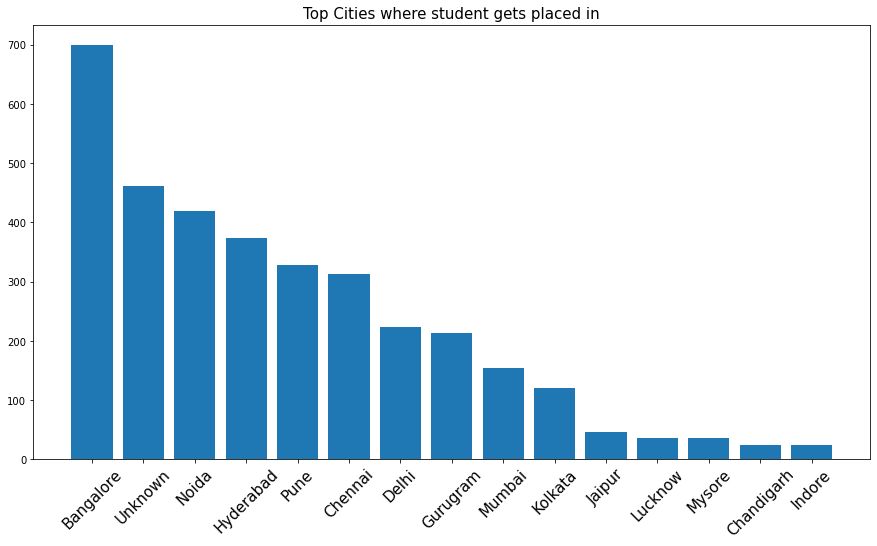

In [58]:
Counts = stats.JobCity.value_counts()[0:15] 
Names = Counts.index
plt.figure(figsize=(15,8))
postionofbars = list(range(len(Names)))
plt.bar(postionofbars,Counts)
plt.xticks(postionofbars,Names)
plt.xticks(rotation=45)
plt.title("Top Cities where student gets placed in",fontsize= "15")
plt.xticks(fontsize= "15" )
plt.show()

#### + Banglore , Noida, Hyderabad, Pune have more no. of jobs available

## Numerical Data Analysis

In [59]:
Numerical = stats.select_dtypes(include=np.number)

In [60]:
Numerical

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOL_Year,DOJ_Year,Birth_Year,Experience,Age
0,420000,84.30,2007,95.80,2,78.00,2011,515,585,525,...,0.9737,0.8128,0.5269,1.35490,-0.4455,2015,2012,1990,3,25
1,500000,85.40,2007,85.00,2,70.06,2012,695,610,780,...,-0.7335,0.3789,1.2396,-0.10760,0.8637,2015,2013,1989,2,26
2,325000,85.00,2010,68.20,2,70.00,2014,615,545,370,...,0.2718,1.7109,0.1637,-0.86820,0.6721,2015,2014,1992,1,23
3,1100000,85.60,2007,83.60,1,74.64,2011,635,585,625,...,0.0464,0.3448,-0.3440,-0.40780,-0.9194,2015,2011,1989,4,26
4,200000,78.00,2008,76.80,2,73.90,2012,545,625,465,...,-0.8810,-0.2793,-1.0697,0.09163,-0.1295,2015,2014,1991,1,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3993,280000,52.09,2006,55.50,2,61.50,2010,365,334,475,...,-0.1082,0.3448,0.2366,0.64980,-0.9194,2012,2011,1987,1,28
3994,100000,90.00,2009,93.00,2,77.30,2013,415,410,535,...,-0.3027,0.8784,0.9322,0.77980,-0.0943,2013,2013,1992,0,23
3995,320000,81.86,2008,65.50,2,70.00,2012,475,475,465,...,-1.5765,-1.5273,-1.5051,-1.31840,-0.7615,2015,2013,1991,2,24
3996,200000,78.72,2010,69.88,2,70.42,2014,450,410,320,...,-0.1590,0.0459,-0.4511,-0.36120,-0.0943,2015,2014,1992,1,23


In [61]:
stats.describe()

,Salary,10percentage,12graduation,12percentage,CollegeTier,collegeGPA,GraduationYear,English,Logical,Quant,...,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,DOL_Year,DOJ_Year,Birth_Year,Experience,Age
count,3.996000e+03,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,...,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000,3996.000000
mean,3.076186e+05,77.924404,2008.087087,74.463596,1.925676,71.487292,2012.609109,501.587337,501.549550,513.294795,...,-0.037663,0.147171,0.002875,-0.169254,-0.137605,2014.572823,2013.044044,1990.427177,1.528779,24.572823
std,2.127350e+05,9.850460,1.653736,11.001374,0.262331,8.169221,1.315683,104.918287,86.768351,122.276093,...,1.028342,0.940868,0.951695,1.007684,1.008071,0.852855,1.282036,1.767868,1.106324,1.767868
min,3.500000e+04,43.000000,1995.000000,40.000000,1.000000,6.450000,2007.000000,180.000000,195.000000,120.000000,...,-4.126700,-5.781600,-4.600900,-2.643000,-7.375700,2005.000000,2004.000000,1977.000000,0.000000,18.000000
25%,1.800000e+05,71.700000,2007.000000,66.000000,2.000000,66.400000,2012.000000,425.000000,445.000000,430.000000,...,-0.687775,-0.287100,-0.604800,-0.868200,-0.669200,2014.000000,2012.000000,1989.000000,1.000000,23.000000
50%,3.000000e+05,79.150000,2008.000000,74.400000,2.000000,71.720000,2013.000000,500.000000,505.000000,515.000000,...,0.046400,0.212400,0.091400,-0.234400,-0.094300,2015.000000,2013.000000,1991.000000,1.000000,24.000000
75%,3.700000e+05,85.670000,2009.000000,82.600000,2.000000,76.337500,2014.000000,570.000000,565.000000,595.000000,...,0.702700,0.812800,0.672000,0.526200,0.502400,2015.000000,2014.000000,1992.000000,2.000000,26.000000
max,4.000000e+06,97.760000,2013.000000,98.700000,2.000000,99.930000,2017.000000,875.000000,795.000000,900.000000,...,1.995300,1.904800,2.535400,3.352500,1.822400,2015.000000,2015.000000,1997.000000,9.000000,38.000000


## Salary

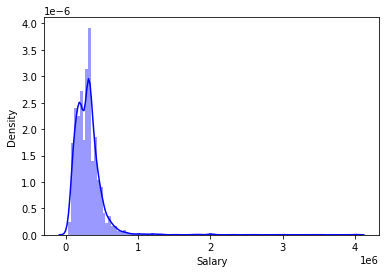

In [62]:
sns.distplot(stats["Salary"],kde=True,color='blue',bins=100)
plt.show()

### Distribution is right skewed means most of the people has less salary.

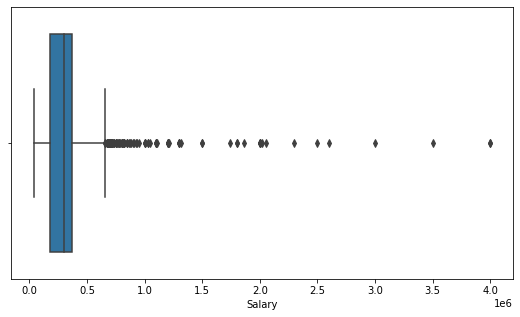

In [31]:
plt.figure(figsize=(9,5))
sns.boxplot(stats['Salary'])
plt.show()

+ Right whisker is 6.5 lac more than that are outliers
+ Salary are between 35k to 40lac CTC 
+ IQR means 50% of data between 2 lac to 3.7 lac 

## Age

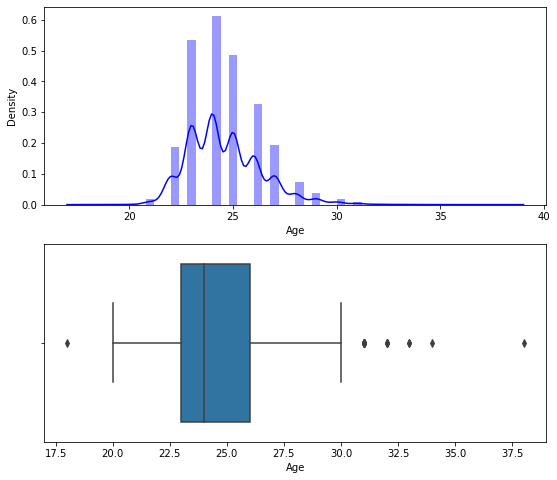

In [64]:
plt.figure(figsize=(9,8))   
plt.subplot(2,1,1) # row,column,position of plot
sns.distplot(stats["Age"],color='blue',kde=True)
plt.subplot(2,1,2)
sns.boxplot(x="Age",data=stats)
plt.show()

### + Age between 20 to 30 student are giving more AMCAT exams

## Joining Year

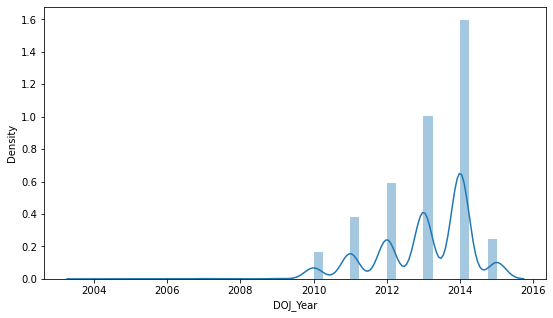

In [65]:
plt.figure(figsize=(9,5))
sns.distplot(stats["DOJ_Year"])
plt.show()

+ Joining increases as the year increases
+ 2014 has highest joining

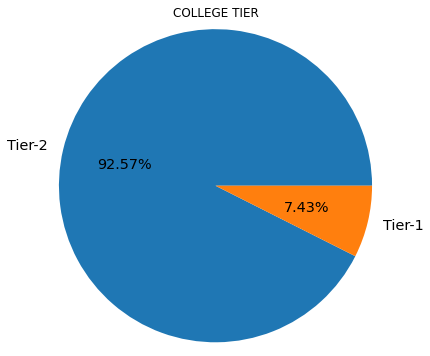

In [66]:
plt.figure(figsize=(6,6))
plt.pie(stats.CollegeTier.value_counts(),labels=['Tier-2','Tier-1'],autopct='%.2f%%',textprops={'size': 'x-large'},radius=1.2)
plt.title('COLLEGE TIER')
plt.show()

## Quant

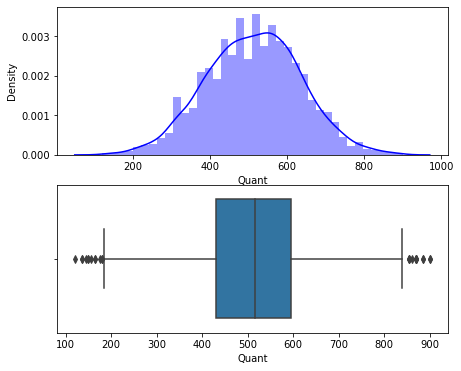

In [67]:
plt.figure(figsize=(7,6))   
plt.subplot(2,1,1) # row,column,position of plot
sns.distplot(stats["Quant"],color='blue',kde=True)
plt.subplot(2,1,2)
sns.boxplot(x="Quant",data=stats)
plt.show()

+ The most of the quant range is between 430 to 595.
+ The least value is 120.
+ The highest value is 900

## English

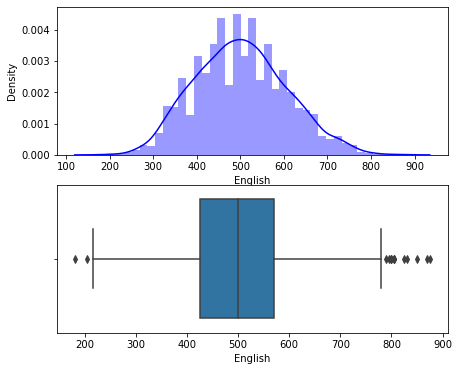

In [68]:
plt.figure(figsize=(7,6))   
plt.subplot(2,1,1) # row,column,position of plot
sns.distplot(stats["English"],color='blue',kde=True)
plt.subplot(2,1,2)
sns.boxplot(x="English",data=stats)
plt.show()

+ The most of the English marks range is between 425 to 570.
+ The least value is 180.
+ The highest value is 875.

## Logical

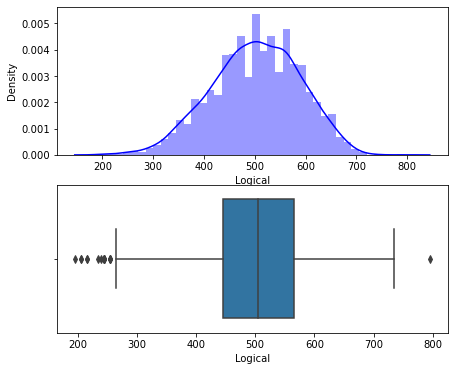

In [69]:
plt.figure(figsize=(7,6))   
plt.subplot(2,1,1) # row,column,position of plot
sns.distplot(stats["Logical"],color='blue',kde=True)
plt.subplot(2,1,2)
sns.boxplot(x="Logical",data=stats)
plt.show()

+ The most of the logical marks range is between 445 to 565.
+ The least value is 195.
+ The highest value is 795

# Bi-Variante Analysis

## Salary vs Degree

<AxesSubplot:xlabel='Degree', ylabel='Salary'>

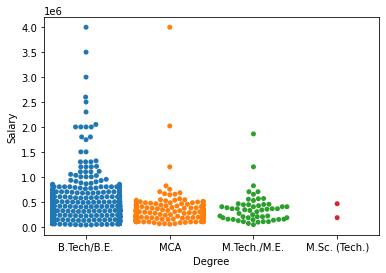

In [70]:
sns.swarmplot(x="Degree",y="Salary",data=stats)

+ B.Tech / BE and MCA has highest salary
+ But Btech/BE gives wide range salary 

## Salary vs Specialization

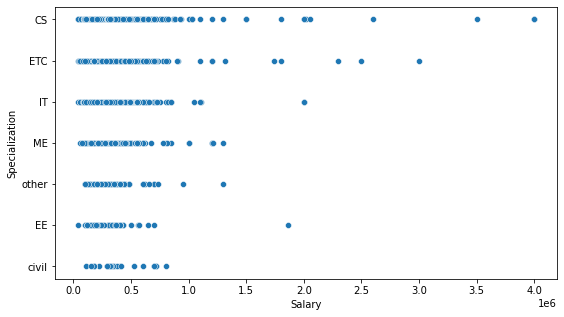

In [120]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=stats, x="Salary", y="Specialization")
plt.show()

### + CS,IT and ETC branch candidate highest salary

## Salary vs Designation

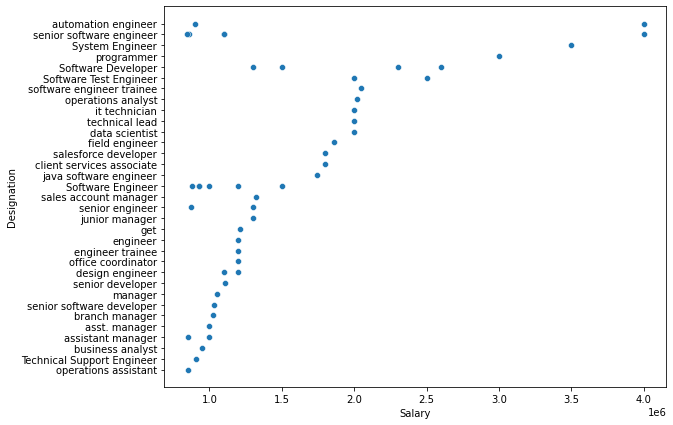

In [72]:
stats1=stats.sort_values(by="Salary",ascending=False)[0:50]
plt.figure(figsize=(9,7))
sns.scatterplot(data=stats1, x="Salary", y="Designation")
plt.show()

### + Roles that has the highest salary are:
+ Automation Engineer
+ Senior Software Engineer
+ System Engineer

## Salary vs Experience

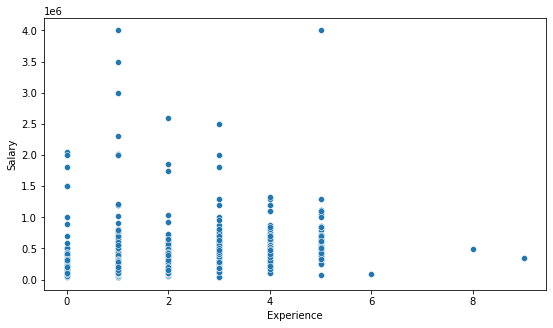

In [123]:
plt.figure(figsize=(9,5))
sns.scatterplot(data=stats, x="Experience", y="Salary")
plt.show()

### + After giving AMCAT Exam 
+ Candidate getting salaries upto 15 to 40 lacs packages for 0 to 3 year exp.
+ 0 to 5 year experience getting wide range of salaries
+ Fresher also getting packages upto 20 lacs

## Joining Year vs Degree

<AxesSubplot:xlabel='Degree', ylabel='DOJ_Year'>

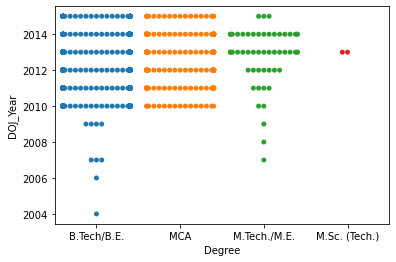

In [74]:
sns.swarmplot(x="Degree",y="DOJ_Year",data=stats)

### + B.Tech /B.E and MCA gives highest joining in between 2010 to 2014

## Joining Year vs Age

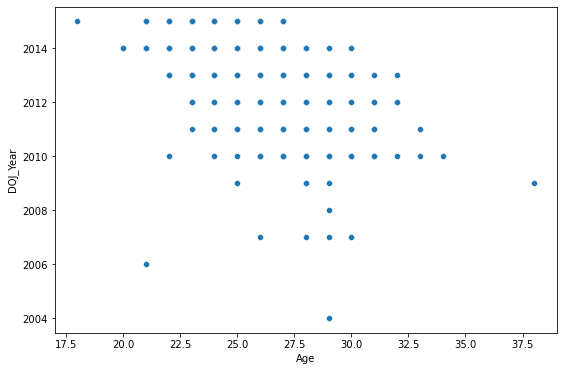

In [75]:
plt.figure(figsize=(9,6))
sns.scatterplot(data=stats, x="Age", y="DOJ_Year")
plt.show()

### + Age between 23 to 30 has highest joining in 2010 to 2014 

## Age vs Experience

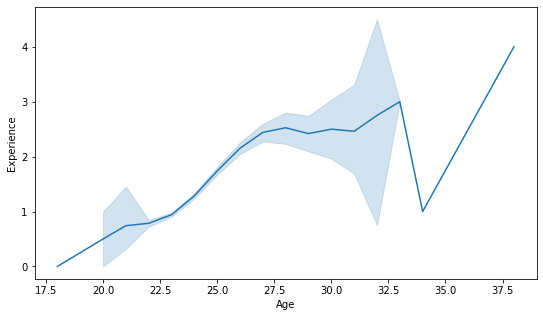

In [76]:
plt.figure(figsize=(9,5))
sns.lineplot(x='Age',y='Experience',data=stats)
plt.show()

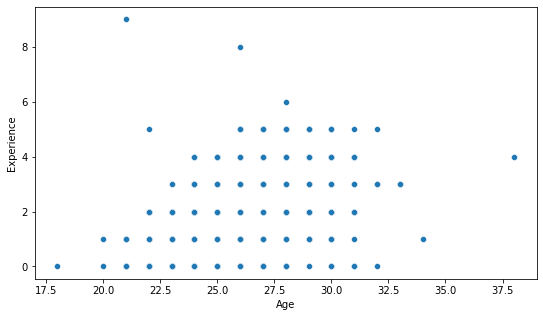

In [77]:
plt.figure(figsize=(9,5))
sns.scatterplot(x='Age',y='Experience',data=stats)
plt.show()

+ As the age increases the experience also increases
+ Age between 26 to 31 candidate gets wide range experience after AMCAT exam

# MULTI-VARIANTE ANALYSIS

In [6]:
cp=stats[stats["ComputerProgramming"]!=-1] #Here -1 indicates candidate not given technical section exam
cs=stats[stats["ComputerScience"]!=-1]
es=stats[stats["ElectronicsAndSemicon"]!=-1]
m=stats[stats["MechanicalEngg"]!=-1]
ee=stats[stats["ElectricalEngg"]!=-1]
civil=stats[stats["CivilEngg"]!=-1]

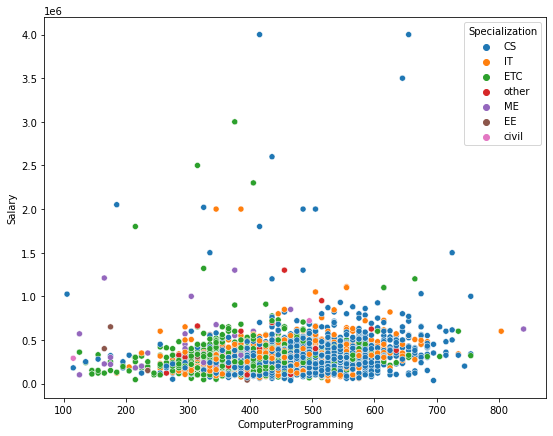

In [27]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="ComputerProgramming",y="Salary", data=cp,hue="Specialization")
plt.show()


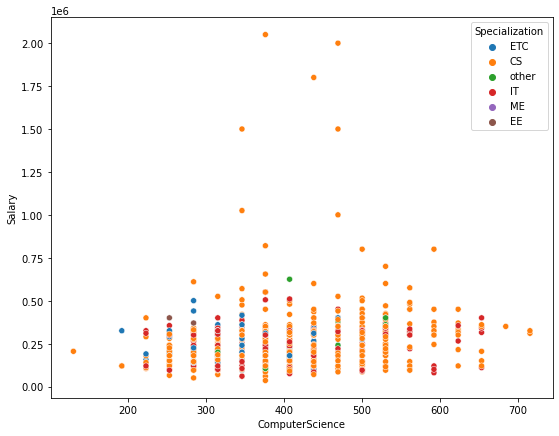

In [26]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="ComputerScience",y="Salary", data=cs,hue="Specialization")
plt.show()


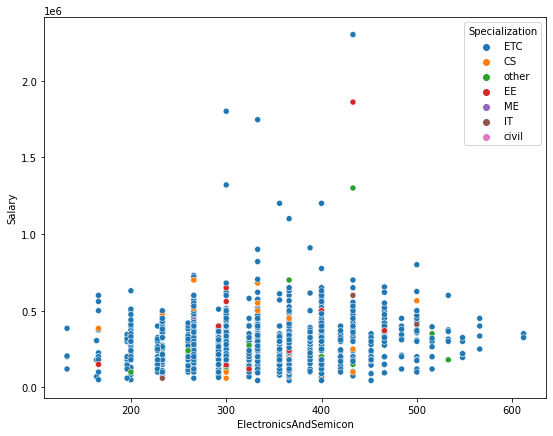

In [25]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="ElectronicsAndSemicon",y="Salary", data=es,hue="Specialization")
plt.show()


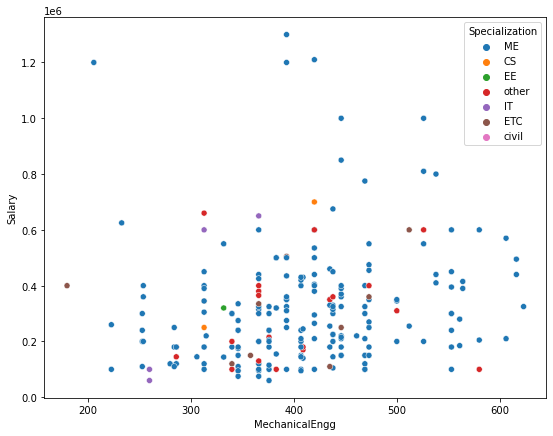

In [24]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="MechanicalEngg",y="Salary", data=m,hue="Specialization")
plt.show()


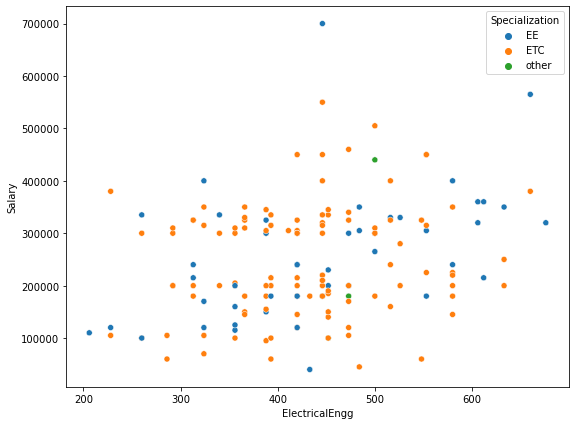

In [23]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="ElectricalEngg",y="Salary", data=ee,hue="Specialization")
plt.show()


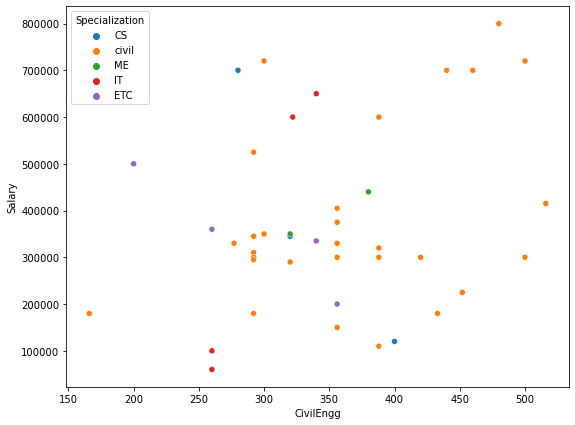

In [34]:
plt.figure(figsize=(9,7))
sns.scatterplot(x="CivilEngg",y="Salary", data=civil,hue="Specialization")
plt.show()


### Looking at the above 6 graphs We can conclude that 
+ Low and intermediate(Below 500) AMCAT score also getting high salary packages
+ Every branch candidate are giving each others specialization section in AMCAT exam  

# Conclusion

+ BTech /B.E and MCA has highest salary and highest joining in between 2010 to 2014
+ CS,IT and ETC branch candidate highest salary
+ Software engineer, Software test engineer,  System engineer and Software developer roles has the highest salary
+ Bangalore , Noida, Hyderabad, Pune have more no. of jobs available and give wide range of salaries
+ 2014 has highest joining
+ AMCAT exam with low and intermediate score also getting high salary packages
